In [1]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive'/'My Drive'/

Mounted at /content/drive
/content/drive/My Drive


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime

In [3]:
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

11493376/11490434 [==============================] - 0s 0us/step


label:  0


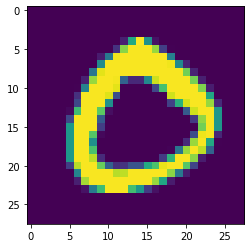

*******************************

label:  6


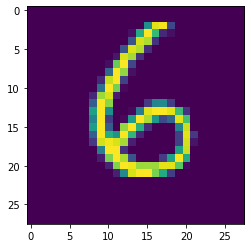

*******************************

label:  8


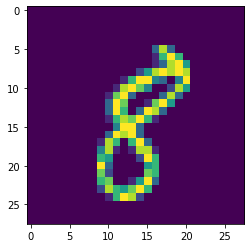

*******************************



In [6]:
for i in range(3):
  rnd = random.randint(0, 30000)
  print("label: ", y_train[rnd])
  plt.imshow(x_train[rnd])
  plt.show()
  print("*******************************\n")

In [7]:
X = x_train.copy().reshape(-1, 28, 28, 1)
y = y_train.copy()

In [8]:
X = X/255.0
y = to_categorical(y, num_classes=10)

In [9]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu", input_shape=X.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))

model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu"))

model.add(Flatten())

model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
history = model.fit(X, y, epochs=50, validation_split=0.3)

Epoch 1/50
1313/1313 [==============================] - 14s 5ms/step - loss: 0.3487 - accuracy: 0.8903 - val_loss: 0.0728 - val_accuracy: 0.9793
Epoch 2/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0658 - accuracy: 0.9787 - val_loss: 0.0712 - val_accuracy: 0.9796
Epoch 3/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0508 - accuracy: 0.9832 - val_loss: 0.0570 - val_accuracy: 0.9849
Epoch 4/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0401 - accuracy: 0.9877 - val_loss: 0.0498 - val_accuracy: 0.9857
Epoch 5/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0283 - accuracy: 0.9905 - val_loss: 0.0586 - val_accuracy: 0.9835
Epoch 6/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0263 - accuracy: 0.9913 - val_loss: 0.0556 - val_accuracy: 0.9861
Epoch 7/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0234 - accuracy: 0.9920 - val_loss: 0.0533 - val_accuracy

In [16]:
X_test = x_test.copy().reshape(-1, 28, 28, 1)
X_test = X_test/255.0
y_test = to_categorical(y_test, num_classes=10)

In [22]:
test_acc = model.evaluate(X_test, y_test, verbose=0)

In [29]:
print("accuracy %.3f" % (test_acc[1]*100))

accuracy 98.900
